# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
X=data.data #Todas expecto class
y=data.target #class

In [3]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn import cluster
model=cluster.KMeans(8)
model.fit(X)
labels = model.labels_

In [5]:
from sklearn import metrics
score=metrics.silhouette_score(X, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)
'''Is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.
A higher Silhouette Coefficient score relates to a model with better defined clusters'''

Silhouetter Score: 0.540


'Is used for measuring the mean of the Silhouette Coefficient for each sample belonging to different clusters.\nA higher Silhouette Coefficient score relates to a model with better defined clusters'

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
model=cluster.KMeans(5)
model.fit(X)
labels = model.labels_
score=metrics.silhouette_score(X, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.549


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
model=cluster.KMeans(3)
model.fit(X)
labels = model.labels_
score=metrics.silhouette_score(X, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.571


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [8]:
#pip install yellowbrick

In [9]:
from yellowbrick.cluster import KElbowVisualizer

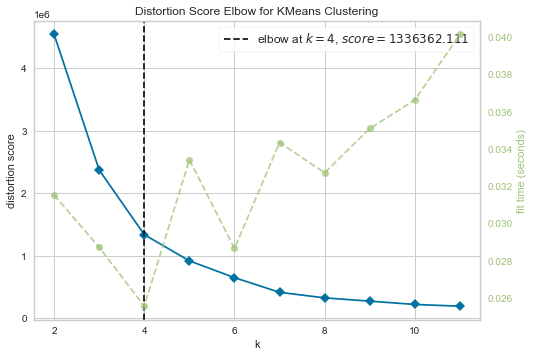

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,12),metric='distortion')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

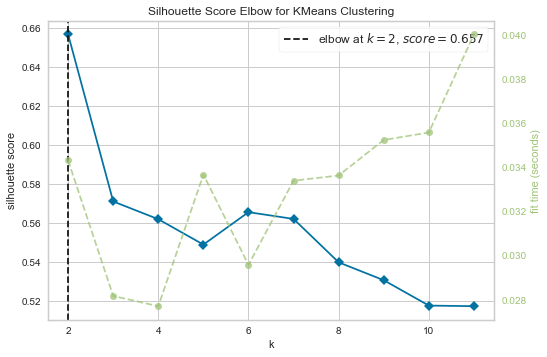

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

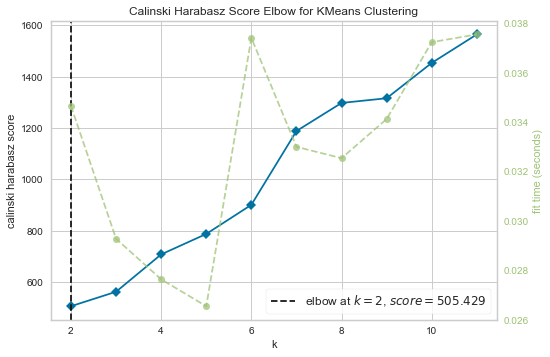

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [12]:
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

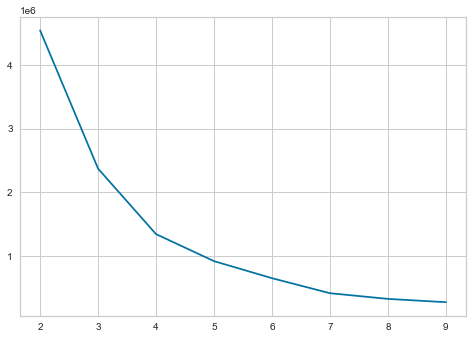

In [13]:
#lo que nos han enseñado
inertia=[]
for k in range(2,10):
    model=cluster.KMeans(k)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(range(2,10),inertia)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [14]:
from sklearn.cluster import AgglomerativeClustering
model=cluster.AgglomerativeClustering()
model.fit(X)

AgglomerativeClustering()

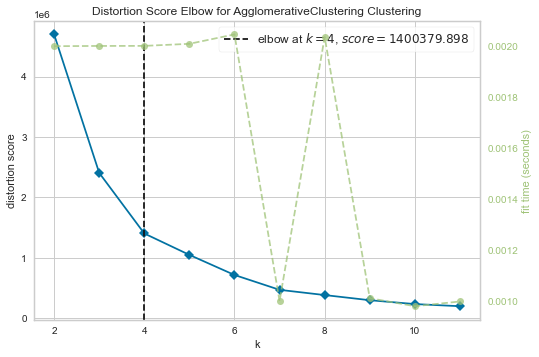

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#distortion
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,12),metric='distortion')
visualizer.fit(X)       
visualizer.show() 

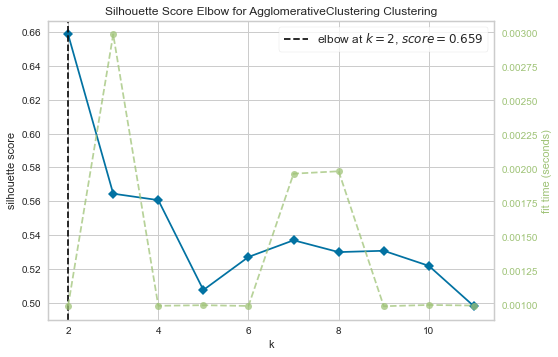

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
#silhouette
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')
visualizer.fit(X)        
visualizer.show() 

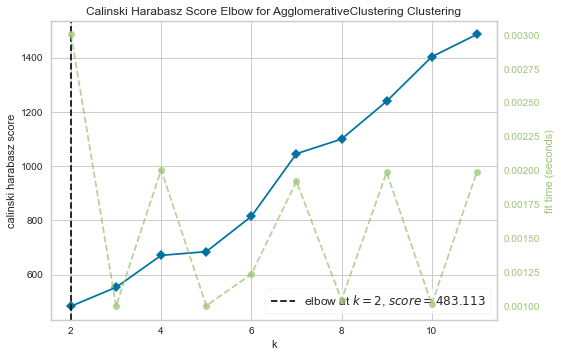

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [17]:
#calinski_harabasz
visualizer = KElbowVisualizer(model, k=(2,12),metric='calinski_harabasz')
visualizer.fit(X)        
visualizer.show() 

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [18]:
model=cluster.KMeans(3)
model.fit(X)
labels = model.labels_

In [19]:
data.feature_names.append('labels_Kmeans_3')

In [20]:
X_new=np.column_stack((X,labels))

In [21]:
df=pd.DataFrame(X_new, columns=data.feature_names)

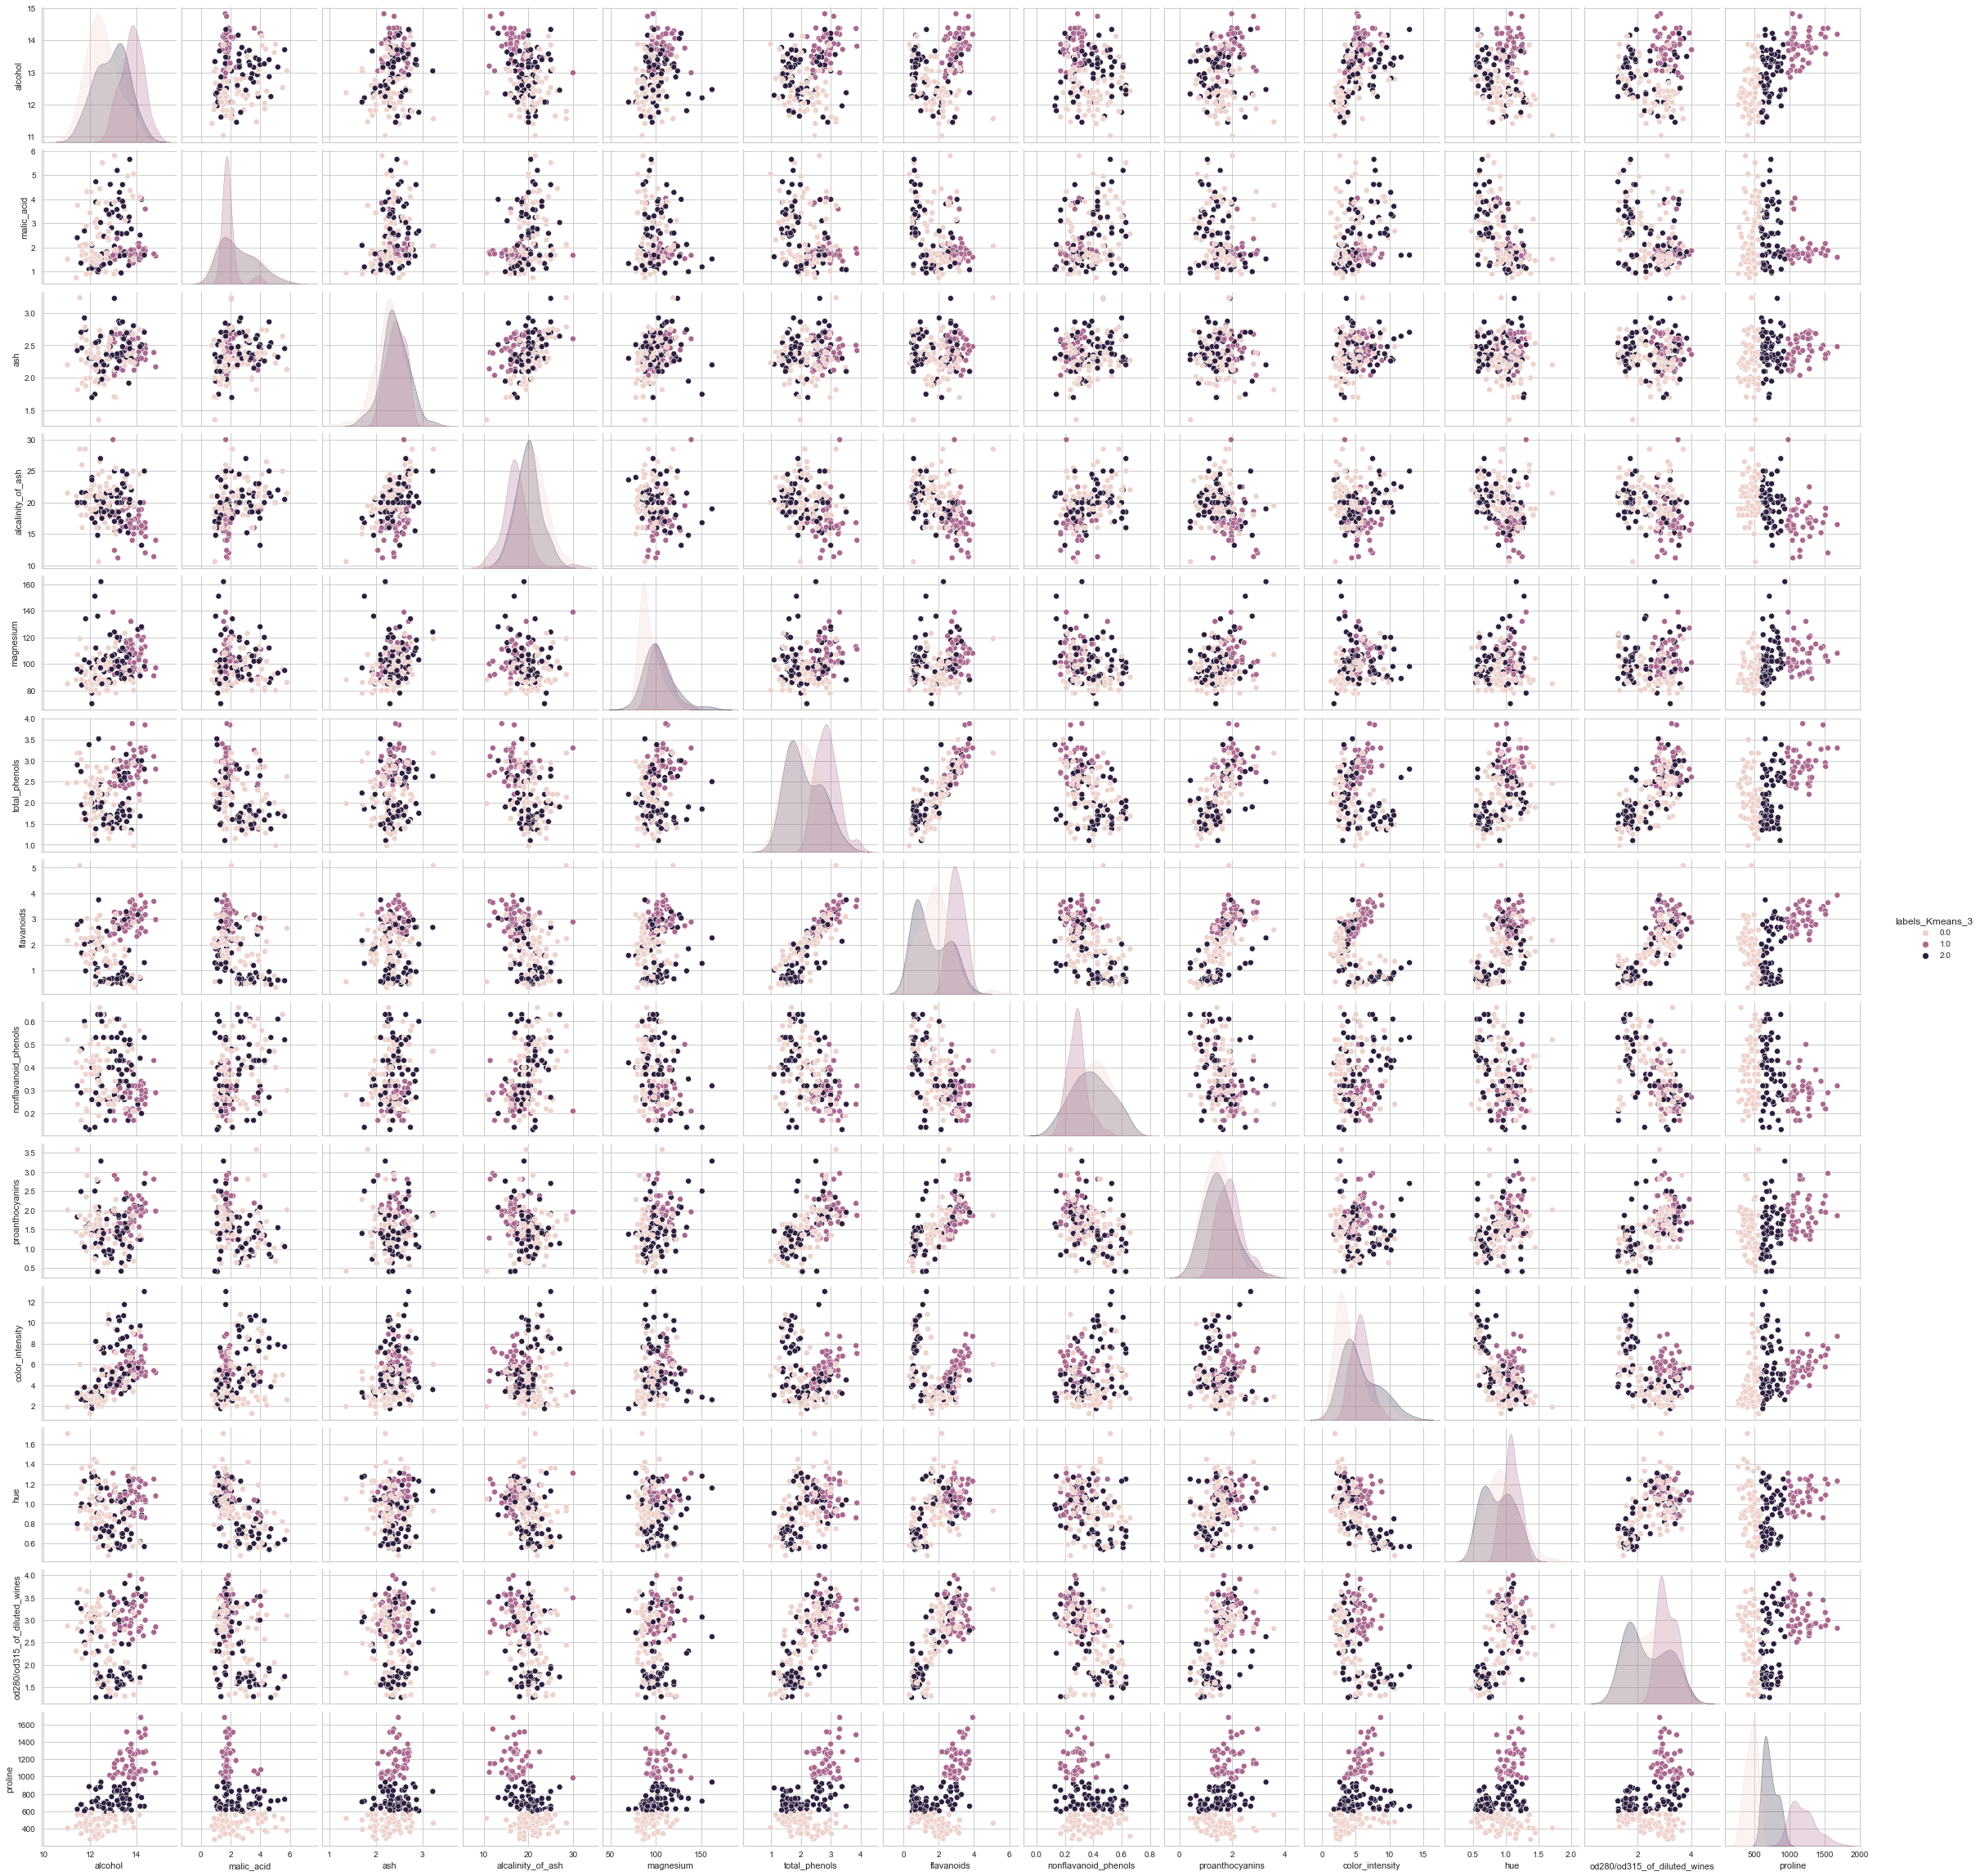

In [22]:
import seaborn as sns
sns.pairplot(df, hue='labels_Kmeans_3')

In [23]:
df['labels']=df['labels_Kmeans_3']
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']

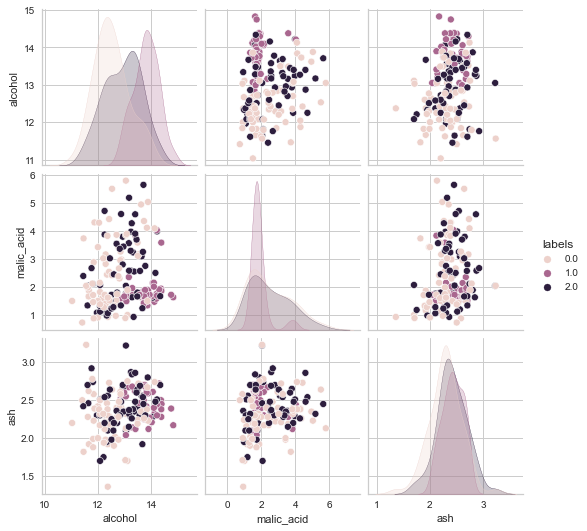

In [24]:
#Primer bin
sns.pairplot(df[bin1], hue='labels')

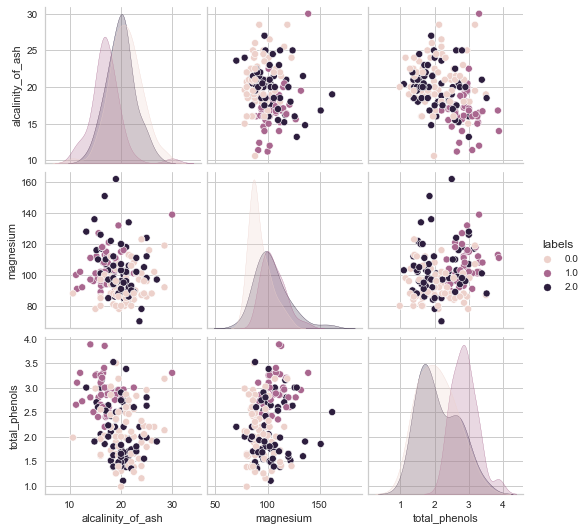

In [25]:
#Segundo bin
sns.pairplot(df[bin2], hue='labels')

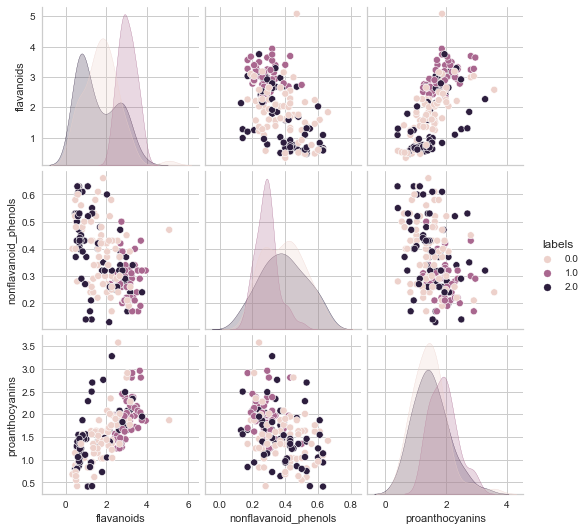

In [26]:
#Tercer bin
sns.pairplot(df[bin3], hue='labels')

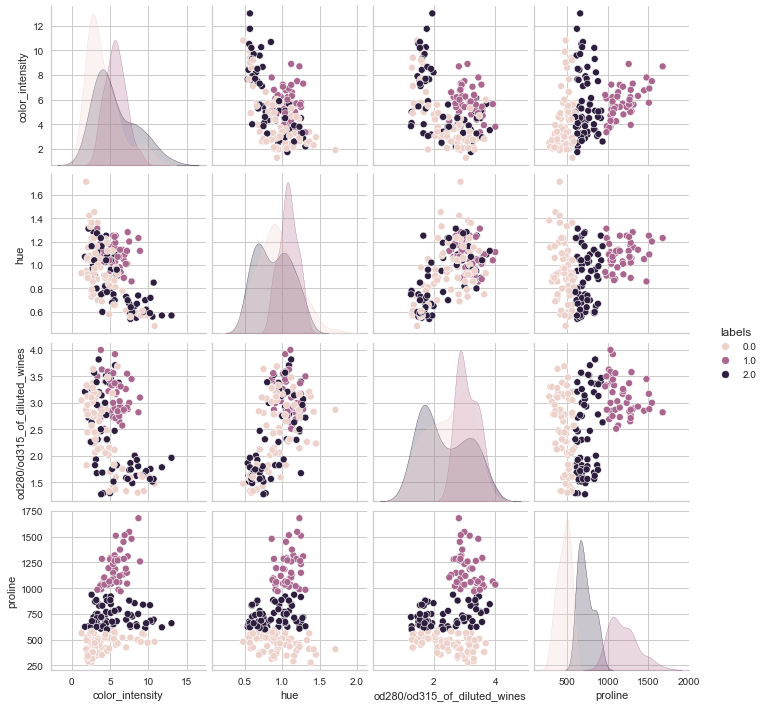

In [27]:
#Cuarto bin
sns.pairplot(df[bin4], hue='labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
#estandarización
X=StandardScaler().fit_transform(X)

In [30]:
#modelo
pca=PCA()
pca.fit(X)
pc=pca.transform(X)
loadings=pc

In [31]:
#Me quedo con los 2 componentes principales
X2=loadings[:,0:2]
X2.shape

(178, 2)

In [32]:
labels.shape

(178,)

In [33]:
X_new=np.column_stack((X2,labels))
df=pd.DataFrame(X_new, columns=['PC1','PC2','label'])

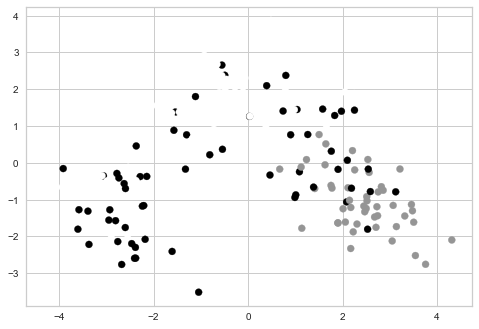

In [34]:
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['label'])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

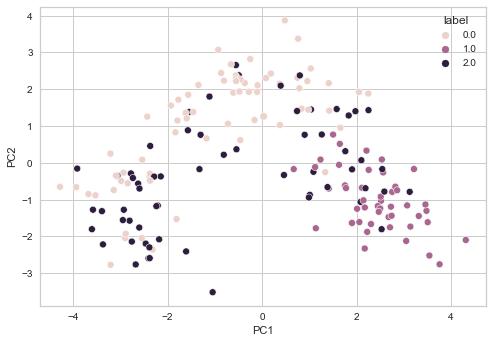

In [35]:
sns.scatterplot(data=df,x='PC1',y='PC2',hue='label')